<a href="https://colab.research.google.com/github/Mehdifasihi/1-d-convolution/blob/master/Geotif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#! pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 15.8 MB/s 


In [ ]:
! pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 178 kB/s 


In [ ]:
import rasterio
import rasterio.plot
#from rasterio.plot import show
#import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from rasterio.plot import show
print('Landsat on osgeo:')
filepath='http://download.osgeo.org/geotiff/samples/misc/tjpeg.tif'
Dataset=rasterio.open(filepath) 
#with rasterio.open(filepath) as src:
#print(Dataset.profile) 
#show (Dataset)

Landsat on osgeo:


{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 16716, 'height': 16716, 'count': 3, 'crs': CRS.from_epsg(26916), 'transform': Affine(0.006915, -0.172433, 744072.520242,
       0.172433, 0.006915, -3741195.29725), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'jpeg', 'interleave': 'pixel', 'photometric': 'ycbcr'}


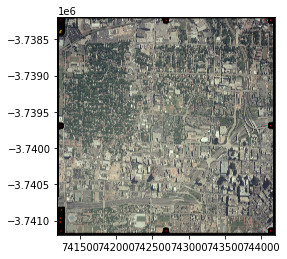

In [ ]:
print(Dataset.profile) 
show (Dataset)

In [ ]:
full_img = Dataset.read()  #Note the 3 bands and shape of image
print("Image resolution is = ", Dataset.height,Dataset.width)


Image resolution is =  16716 16716


In [ ]:
#To find out number of bands in an image
num_bands = Dataset.count
print("Number of bands in the image = ", num_bands)

img_band1 = Dataset.read(1) #1 stands for 1st band. 
img_band2 = Dataset.read(2) #2 stands for 2nd band. 
img_band3 = Dataset.read(3) #3 stands for 3rd band. 


Number of bands in the image =  3


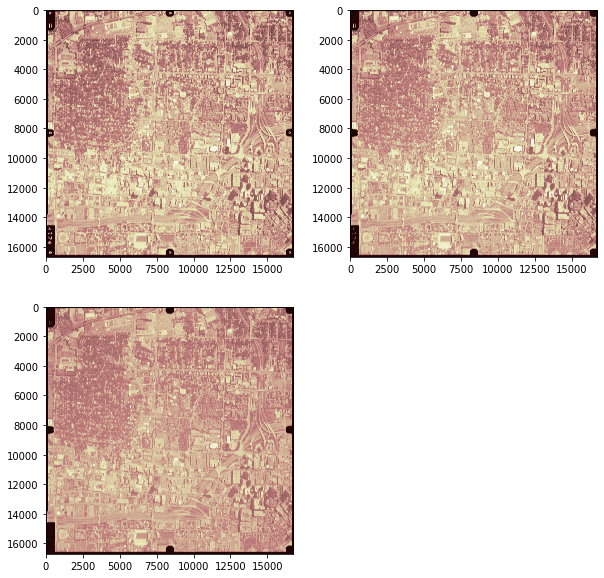

In [ ]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img_band1, cmap='pink')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(img_band2, cmap='pink')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(img_band3, cmap='pink')

In [ ]:
# Coordinate Reference System
print("Coordinate Reference System is = ", Dataset.crs)


Coordinate Reference System is =  EPSG:26916


In [ ]:
# Read metadata
metadata = Dataset.meta
print('Metadata: {metadata}\n'.format(metadata=metadata))

Metadata: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 16716, 'height': 16716, 'count': 3, 'crs': CRS.from_epsg(26916), 'transform': Affine(0.006915, -0.172433, 744072.520242,
       0.172433, 0.006915, -3741195.29725)}



In [ ]:
#Read description, if any
desc = Dataset.descriptions
print('Raster description: {desc}\n'.format(desc=desc))

Raster description: (None, None, None)



In [ ]:
#To find out geo transform
print("Geotransform : ", Dataset.transform)

Geotransform :  | 0.01,-0.17, 744072.52|
| 0.17, 0.01,-3741195.30|
| 0.00, 0.00, 1.00|


In [ ]:
## Plot pixel value histogram in each band. 
rasterio.plot.show_hist(full_img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3)
# Peak at 255 is pixels with no data, outside region of interest.

In [ ]:
clipped_img = full_img[:, 300:900, 300:900]
plt.imshow(clipped_img[0,:,:])
rasterio.plot.show_hist(clipped_img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3)
#Each band showing slightly different information
